# **IRIS FLOWERS CLASSIFICATION ML PROJECT**

## Importing libraries

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Loading  *Iris dataset*

In [41]:
# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, header=None, names=column_names)

## Data Exploration

In [42]:
iris_data.head()



,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
iris_data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

## Creating model using Logistic regression

In [46]:
# Encoding class labels
label_encoder = LabelEncoder()
iris_data['class'] = label_encoder.fit_transform(iris_data['class'])

# Splitting data into features and target
X = iris_data.drop('class', axis=1)
y = iris_data['class']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Visualization

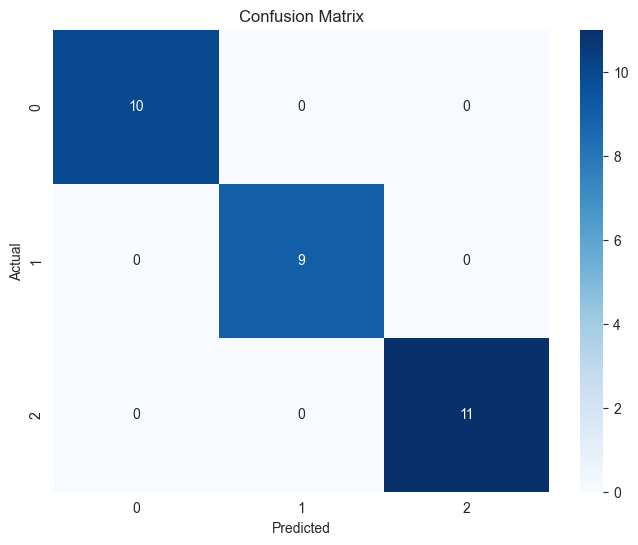

In [47]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

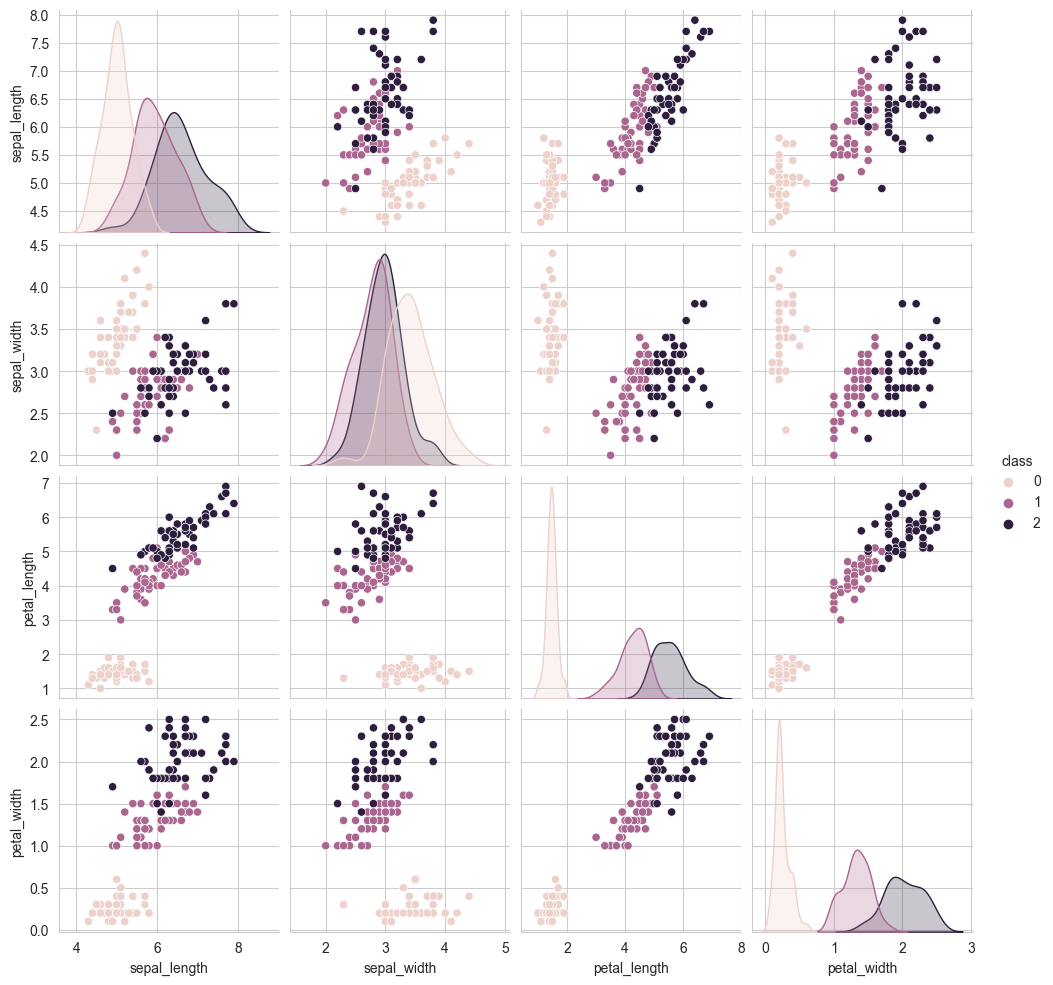

In [48]:
# Visualize the data
sns.pairplot(iris_data, hue='class')
plt.show()

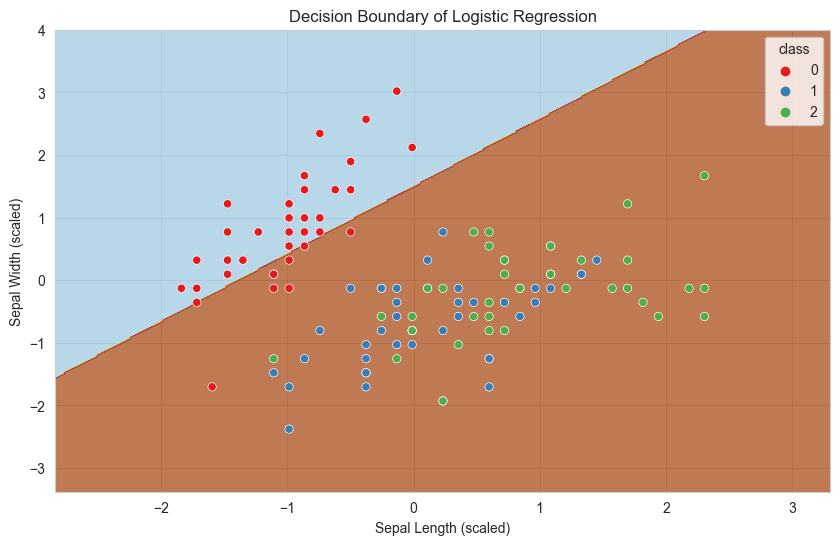

In [49]:
# Visualize the decision boundary
plt.figure(figsize=(10, 6))
h = .02  # Step size in the mesh
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg_model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])  # Adding dummy zeros for the missing features
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, palette='Set1')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Decision Boundary of Logistic Regression')
plt.show()

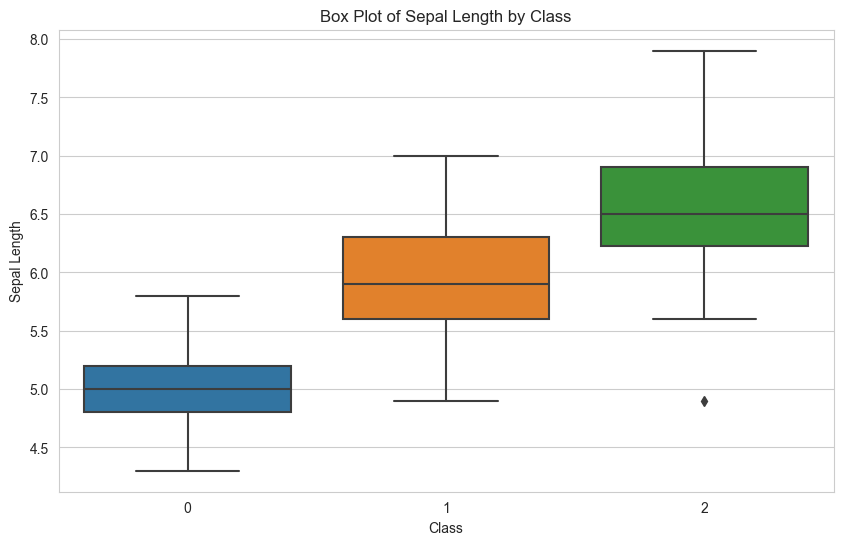

In [50]:
#Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='sepal_length', data=iris_data)
plt.xlabel('Class')
plt.ylabel('Sepal Length')
plt.title('Box Plot of Sepal Length by Class')
plt.show()


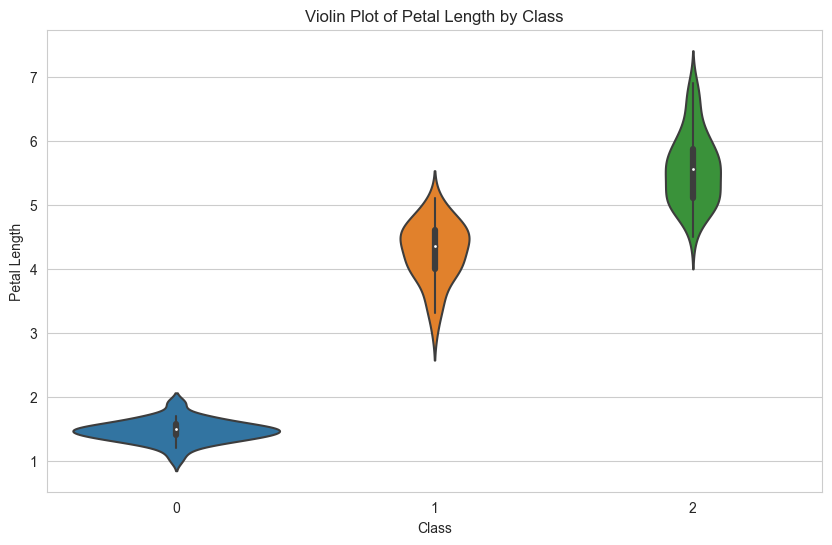

In [51]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='petal_length', data=iris_data)
plt.xlabel('Class')
plt.ylabel('Petal Length')
plt.title('Violin Plot of Petal Length by Class')
plt.show()


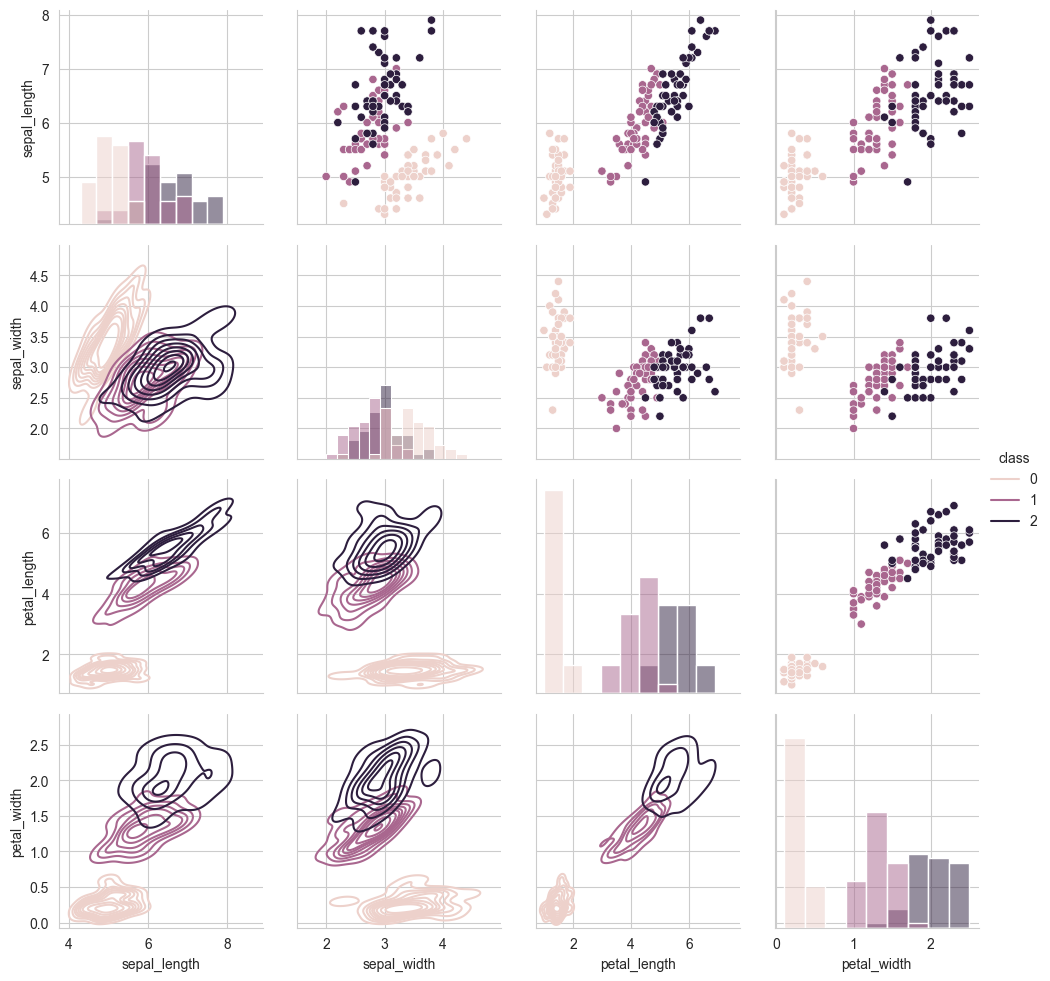

In [52]:
# pair grid plots
sns.set_style("whitegrid")
g = sns.PairGrid(iris_data, hue='class')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.show()


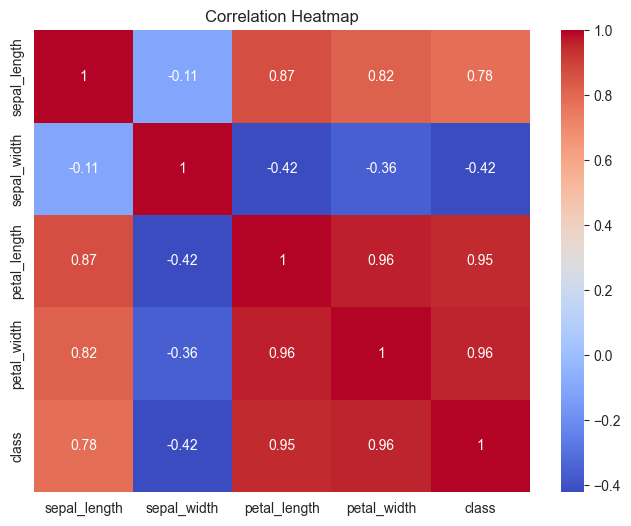

In [53]:
# Correlation heatmap
correlation_matrix = iris_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


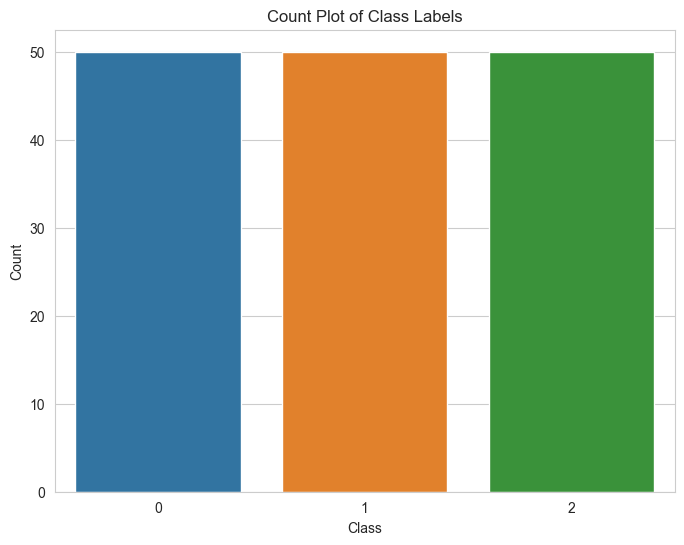

In [54]:
# count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=iris_data)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count Plot of Class Labels')
plt.show()


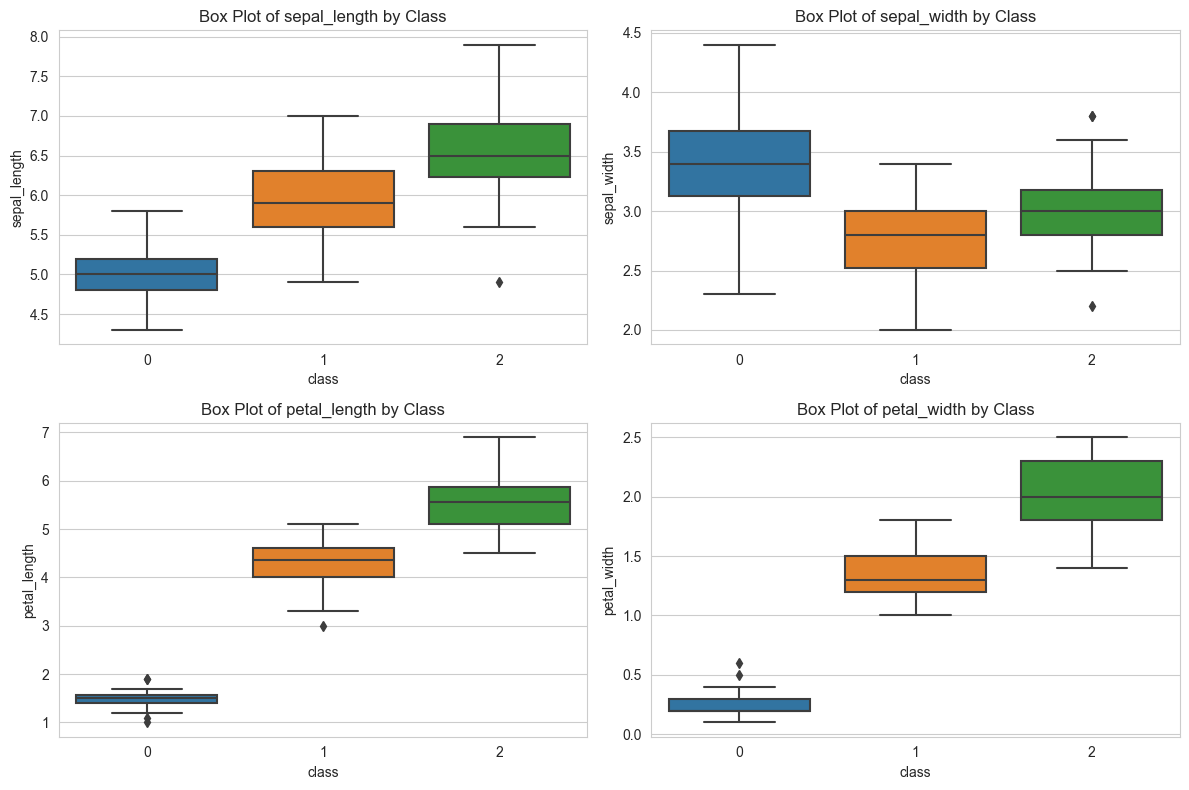

In [55]:
# Box plots for each feature by class
plt.figure(figsize=(12, 8))
for i, col in enumerate(iris_data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='class', y=col, data=iris_data)
    plt.title(f'Box Plot of {col} by Class')
plt.tight_layout()
plt.show()